In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
set_matplotlib_formats("svg")
plt.style.use('ggplot')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Animations
import time
from IPython.display import display, HTML, IFrame, clear_output
import ipywidgets as widgets

def normal_curve(x, mu=0, sigma=1):
    return 1 / np.sqrt(2*np.pi) * np.exp(-(x - mu)**2/(2 * sigma**2))

def normal_area(a, b, bars=False):
    x = np.linspace(-4, 4, 1000)
    y = normal_curve(x)
    ix = (x >= a) & (x <= b)
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, color='black')
    plt.fill_between(x[ix], y[ix], color='gold')
    if bars:
        plt.axvline(a, color='red')
        plt.axvline(b, color='red')
    plt.title(f'Area between {np.round(a, 2)} and {np.round(b, 2)}')
    plt.show()

def show_clt_slides():
    src = "https://docs.google.com/presentation/d/e/2PACX-1vTcJd3U1H1KoXqBFcWGKFUPjZbeW4oiNZZLCFY8jqvSDsl4L1rRTg7980nPs1TGCAecYKUZxH5MZIBh/embed?start=false&loop=false&delayms=3000"
    width = 960
    height = 509
    display(IFrame(src, width, height))

# Lecture 22 – The Normal Distribution, The Central Limit Theorem 

## DSC 10, Fall 2022

### Announcements

- Lab 7 is due **Saturday 11/19 at 11:59pm**.
- The Final Project is released, and has two deadlines:
    - The **checkpoint** is due **tomorrow at 11:59pm**. **No slip days!**
    - The **final submission** is due **Tuesday 11/29 at 11:59pm**. Slip days allowed.
- See the [calendar](https://dsc10.com/calendar) for the latest office hours schedule.

### Agenda

- The normal distribution.
- The Central Limit Theorem.

### Recap: Standard units

SAT scores range from 0 to 1600. The distribution of SAT scores has a mean of 950 and a standard deviation of 300. Your friend tells you that their SAT score, in standard units, is 2.5. What do you conclude?

## The normal distribution

### Recap: The standard normal distribution

- The standard normal distribution can be thought of as a "continuous histogram."

- Like a histogram:
    - The **area** between $a$ and $b$ is the **proportion** of values between $a$ and $b$.
    - The total area underneath the normal curve is is 1.

- The standard normal distribution's **cumulative density function** (CDF) describes the proportion of values in the distribution less than or equal to $z$, for all values of $z$.
    - In Python, we use the function `scipy.stats.norm.cdf`.

### Areas under the standard normal curve

What does `scipy.stats.norm.cdf(0)` evaluate to? Why?

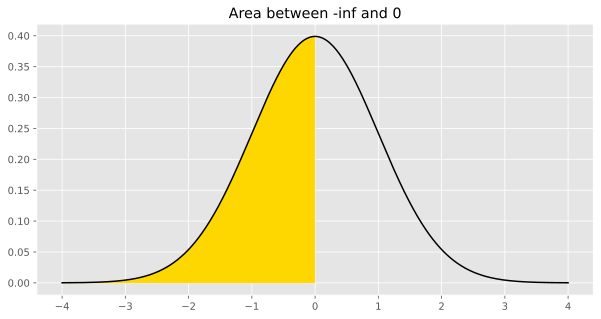

In [2]:
normal_area(-np.inf, 0)

In [3]:
from scipy import stats
stats.norm.cdf(0)

0.5

### Areas under the standard normal curve

Suppose we want to find the area to the **right** of 2 under the standard normal curve.

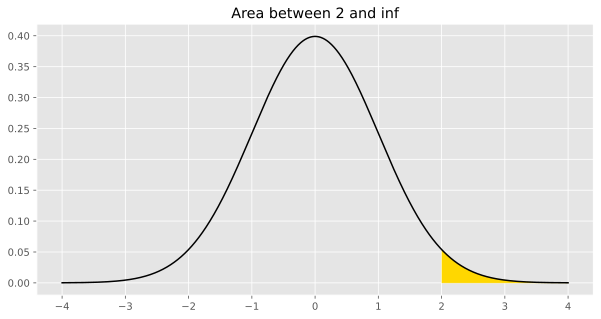

In [4]:
normal_area(2, np.inf)

The following expression gives us the area to the **left** of 2.

In [5]:
stats.norm.cdf(2)

0.9772498680518208

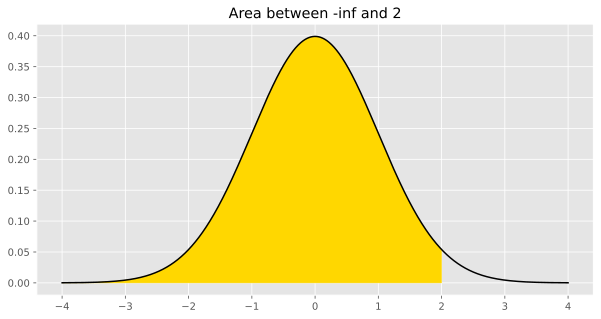

In [6]:
normal_area(-np.inf, 2)

However, since the total area under the standard normal curve is 1:

$$\text{area right of $2$} = 1 - (\text{area left of $2$})$$

In [7]:
1 - stats.norm.cdf(2)

0.02275013194817921

### Areas under the standard normal curve

How might we use `stats.norm.cdf` to compute the area between -1 and 0?

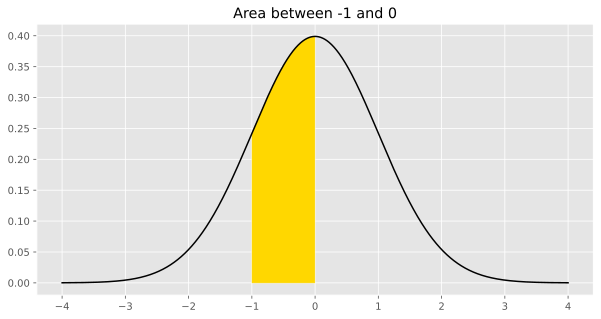

In [8]:
normal_area(-1, 0)

Strategy:

$$\text{area from $-1$ to $0$} = (\text{area left of $0$}) - (\text{area left of $-1$})$$

In [9]:
stats.norm.cdf(0) - stats.norm.cdf(-1)

0.3413447460685429

### General strategy for finding area

The area under the standard normal curve in the interval $[a, b]$ is 

```py
stats.norm.cdf(b) - stats.norm.cdf(a)
```

What can we do with this? We're about to see!

## Using the normal distribution

Let's return to our data set of heights and weights.

In [10]:
height_and_weight = bpd.read_csv('data/height_and_weight.csv')
height_and_weight

,Height,Weight
0,73.85,241.89
1,68.78,162.31
2,74.11,212.74
...,...,...
4997,67.01,199.20
4998,71.56,185.91
4999,70.35,198.90


As we saw before, both variables are roughly normal. What _benefit_ is there to knowing that the two distributions are roughly normal?

### Standard units and the normal distribution

- **Key idea: The $x$-axis in a plot of the <u>standard</u> normal distribution is in <u>standard</u> units.**
    - For instance, the area between -1 and 1 is the proportion of values within 1 standard deviation of the mean.

- Suppose a distribution is roughly normal. Then, these are two are approximately equal:
    - The proportion of values in the distribution between $a$ and $b$.
    - The area between $z(a)$ and $z(b)$ under the standard normal curve. (Recall, $z(x_i) = \frac{x_i - \text{mean of $x$}}{\text{SD of $x$}}$.)

### Example: Proportion of weights between 200 and 225 pounds

Let's suppose, as is often the case, that we don't have access to the entire distribution of weights, just the mean and SD.

In [11]:
weights = height_and_weight.get('Weight')
weight_mean = weights.mean()
weight_mean

187.0206206581932

In [12]:
weight_std = np.std(weights)
weight_std

19.779176302396458

Using just this information, we can estimate the proportion of weights between 200 and 225 pounds:

1. Convert 200 to standard units.
2. Convert 225 to standard units.
3. Use `stats.norm.cdf` to find the area between (1) and (2).

In [13]:
left = (200 - weight_mean) / weight_std
left

0.656214351061435

In [14]:
right = (225 - weight_mean) / weight_std
right

1.9201699181580782

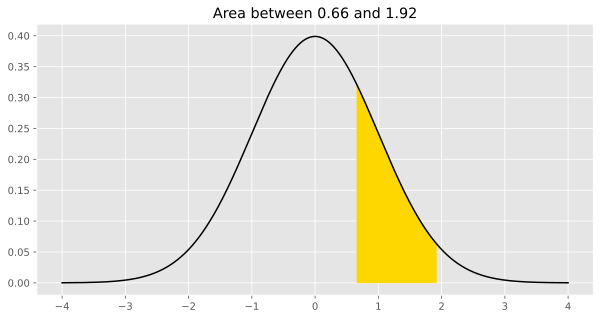

In [15]:
normal_area(left, right)

In [16]:
approximation = stats.norm.cdf(right) - stats.norm.cdf(left)
approximation

0.22842488819306406

### Checking the approximation

Since we have access to the entire set of weights, we can compute the true proportion of weights between 200 and 225 pounds.

In [17]:
# True proportion of values between 200 and 225.
height_and_weight[
    (height_and_weight.get('Weight') >= 200) &
    (height_and_weight.get('Weight') <= 225)
].shape[0] / height_and_weight.shape[0]

0.2294

In [18]:
# Approximation using the standard normal curve.
approximation

0.22842488819306406

Pretty good for an approximation! 🤩

### Warning: Standardization doesn't make a distribution normal!

Consider the distribution of delays from earlier in the lecture.

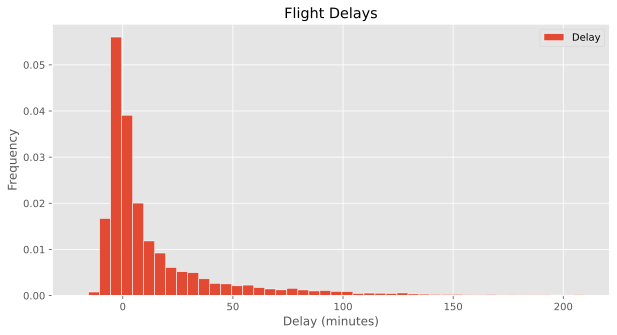

In [19]:
delays = bpd.read_csv('data/delays.csv')
delays.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 5), density=True, ec='w', figsize=(10, 5), title='Flight Delays')
plt.xlabel('Delay (minutes)');

The distribution above does not look normal. It won't look normal even if we standardize it. By standardizing a distribution, all we do is move it horizontally and stretch it vertically – the shape itself doesn't change.

In [20]:
HTML('data/delay_anim.html')

## Center and spread, revisited

### Special cases

- As we just discovered, the $x$-axis in the standard normal curve represents standard units.
- Often times, we want to know the proportion of values within $z$ standard deviations of the mean.

|Percent in Range | Normal Distribution |
|---|---|
|$\text{mean} \pm 1 \: \text{SD}$ | $\approx 68\%$ |
|$\text{mean} \pm 2 \: \text{SDs}$ | $\approx 95\%$ |
|$\text{mean} \pm 3 \: \text{SDs}$ | $\approx 99.73\%$ |

### 68% of values are within 1 SD of the mean

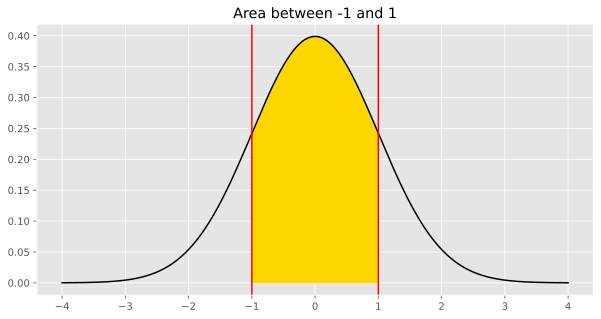

In [21]:
normal_area(-1, 1, bars=True)

In [22]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

This means that if a variable follows a normal distribution, approximately 68% of values will be within 1 SD of the mean.

### 95% of values are within 2 SDs of the mean

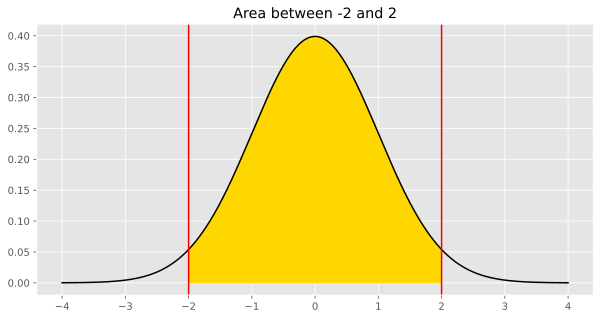

In [23]:
normal_area(-2, 2, bars=True)

In [24]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

- If a variable follows a normal distribution, approximately 95% of values will be within 2 SDs of the mean.
- Consequently, 5% of values will be outside this range.
- Since the normal curve is symmetric, 
    - 2.5% of values will be more than 2 SDs above the mean, and
    - 2.5% of values will be more than 2 SDs below the mean.

### Chebyshev's inequality and the normal distribution

- Last class, we looked at Chebyshev's inequality, which stated that the proportion of data within $z$ SDs of the mean is **at least** $1-\frac{1}{z^2}$.
    - This works for any distribution, and is a lower bound.

- If we know that the distribution is normal, we can be even more specific:


| Range | All Distributions (via Chebyshev's inequality) | Normal Distribution|
|---|---|---|
| mean $\pm \ 1$ SD | $\geq 0\%$ |$\approx 68\%$ |
| mean $\pm \ 2$ SDs | $\geq 75\%$ | $\approx 95\%$ |
| mean $\pm \ 3$ SDs | $\geq 88.8\%$ | $\approx 99.73\%$ |

- The percentages you see for normal distributions above are approximate, but are not lower bounds.
    - **Important**: They apply to all normal distributions, standardized or not. This is because all normal distributions are just stretched and shifted versions of the standard normal.

### Inflection points

- Last class, we mentioned that the standard normal curve has inflection points at $z = \pm 1$.
    - Inflection point: where the curve goes from "opening down" to "opening up."

- We know that the $x$-axis of the standard normal curve represents standard units, so the inflection points are at 1 standard deviation above and below the mean.

- This means that if a distribution is roughly normal, we can determine its standard deviation by finding the distance between each inflection point and the mean.

### Example: Inflection Points

Remember: The distribution of heights is roughly normal, but it is _not_ a _standard_ normal distribution. 

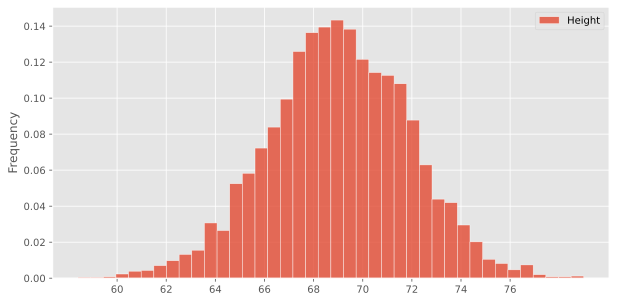

In [25]:
height_and_weight.plot(kind='hist', y='Height', density=True, ec='w', bins=40, alpha=0.8, figsize=(10, 5));
plt.xticks(np.arange(60, 78, 2));

- The center appears to be around 69.
- The inflection points appear to be around 66 and 72.
- So, the standard deviation is roughly 72 - 69 = 3.

In [26]:
np.std(height_and_weight.get('Height'))

2.863075878119538

## The Central Limit Theorem

### Back to flight delays ✈️

The distribution of flight delays that we've been looking at is _not_ roughly normal.

In [37]:
!ls ../../../../../img

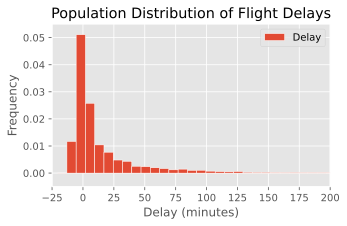

In [53]:
delays = bpd.read_csv('data/delays.csv')
delays.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 7.5), density=True, ec='w', figsize=(5, 3), title='Population Distribution of Flight Delays')
plt.xlabel('Delay (minutes)')
plt.xlim(-25, 200)
plt.ylim(-0.005, 0.055)
plt.savefig('../../../../../img/pop.png', dpi=200, bbox_inches='tight')

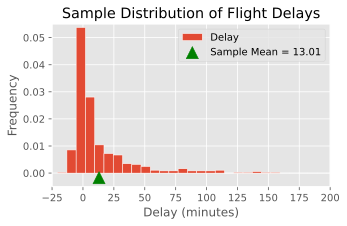

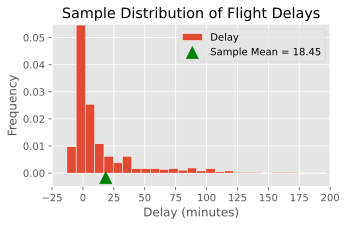

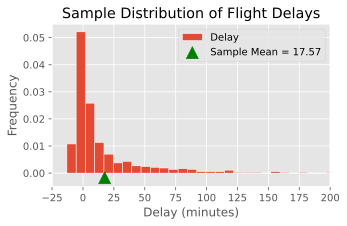

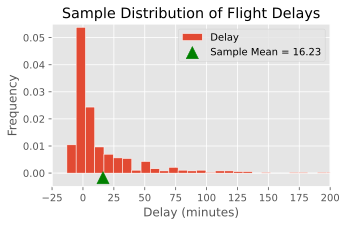

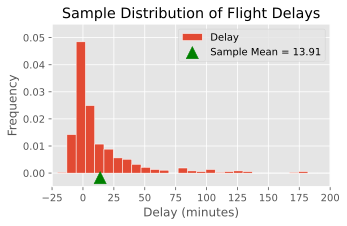

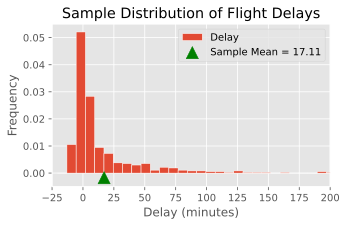

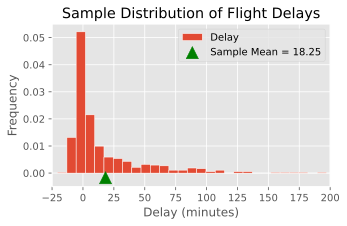

In [51]:
np.random.seed(42)
for i in range(1, 8):
    samp = delays.sample(500)
    samp_mean = samp.get('Delay').mean()
    samp.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 7.5), density=True, ec='w', figsize=(5, 3), title='Sample Distribution of Flight Delays')
    plt.xlabel('Delay (minutes)')
    plt.scatter([samp_mean], [-0.0017], color='green', marker='^', s=150, label=f'Sample Mean = {np.round(samp_mean, 2)}', zorder=2)
    plt.legend()
    plt.xlim(-25, 200)
    plt.ylim(-0.005, 0.055)
    plt.savefig(f'../../../../../img/samp{i}.png', dpi=200, bbox_inches='tight')

In [28]:

delays.get('Delay').describe()

count    13825.00
mean        16.66
std         39.48
           ...   
50%          2.00
75%         18.00
max        580.00
Name: Delay, Length: 8, dtype: float64

### Empirical distribution of a sample statistic

- Before we started discussing center, spread, and the normal distribution, our focus was on bootstrapping.

- We used the bootstrap to estimate **the distribution of a sample statistic (e.g. sample mean or sample median)**, using just a single sample.

- We did this to construct confidence intervals for a population parameter.

- **Important**: For now, we'll suppose our parameter of interest is the population mean, **so we're interested in estimating the distribution of the sample mean**.

### Empirical distribution of the sample mean 

Since we have access to the population of flight delays, let's remind ourselves what the distribution of the sample mean looks like by drawing samples repeatedly from the population.

- This is **not bootstrapping**.
- This is also **not practical**. If we had access to a population, we wouldn't need to understand the distribution of the sample mean – we'd be able to compute the population mean directly.

In [54]:
sample_means = np.array([])
repetitions = 2000

for i in np.arange(repetitions):
    sample = delays.sample(500)
    sample_mean = sample.get('Delay').mean()
    sample_means = np.append(sample_means, sample_mean)
    
sample_means

array([15.49, 13.21, 16.17, ..., 17.19, 18.34, 15.92])

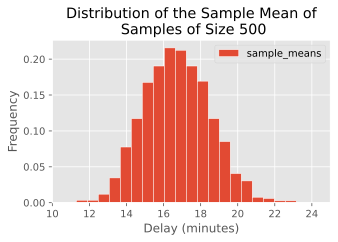

In [66]:
bpd.DataFrame().assign(sample_means=sample_means).plot(kind='hist', density=True, ec='w', bins=20, figsize=(5, 3));
plt.xlabel('Delay (minutes)')
plt.xlim(10, 25)
# plt.ylim(-0.005, 0.055)
plt.title('Distribution of the Sample Mean of\n Samples of Size 500')
plt.legend();
plt.savefig(f'../../../../../img/clt.png', dpi=200, bbox_inches='tight')

Notice that this distribution is roughly normal, even though the population distribution was not! This distribution is centered at the population mean.

### The Central Limit Theorem

> The Central Limit Theorem (CLT) says that the probability distribution of the **sum or mean** of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.

While the formulas we're about to introduce only work for sample means, it's important to remember that the statement above also holds true for sample sums.

### Characteristics of the distribution of the sample mean

- **Shape**: The CLT says that the distribution of the sample mean is roughly normal, no matter what the population looks like.

- **Center**: This distribution is centered at the population mean.

- **Spread**: What is the standard deviation of the distribution of the sample mean? How is it impacted by the sample size?

### Changing the sample size

The function `sample_mean_delays` takes in an integer `sample_size`, and:
1. Takes a sample of size `sample_size` directly from the population.
2. Computes the mean of the sample.
3. Repeats steps 1 and 2 above 2000 times, and returns an array of the resulting means.

In [ ]:
def sample_mean_delays(sample_size):
    sample_means = np.array([])
    for i in np.arange(2000):
        sample = delays.sample(sample_size)
        sample_mean = sample.get('Delay').mean()
        sample_means = np.append(sample_means, sample_mean)
    return sample_means

Let's call `sample_mean_delays` on several values of `sample_size`.

In [ ]:
sample_means = {}
sample_sizes = [5, 10, 50, 100, 200, 400, 800, 1600]

for size in sample_sizes:
    sample_means[size] = sample_mean_delays(size)

Let's look at the resulting distributions.

In [ ]:
# Plot the resulting distributions.
bins = np.arange(5, 30, 0.5)
for size in sample_sizes:
    bpd.DataFrame().assign(data=sample_means[size]).plot(kind='hist', bins=bins, density=True, ec='w', title=f'Distribution of the Sample Mean for Samples of Size {size}', figsize=(10, 5))
    plt.legend('');
    plt.show()
    time.sleep(1.5)
    if size != sample_sizes[-1]:
        clear_output()

What do you notice? 🤔

### Standard deviation of the distribution of the sample mean

- As we increase our sample size, the distribution of the sample mean gets narrower, and so its standard deviation decreases.
- Can we determine exactly how much it decreases by?

In [ ]:
# Compute the standard deviation of each distribution.
sds = np.array([])
for size in sample_sizes:
    sd = np.std(sample_means[size])
    sds = np.append(sds, sd)
sds

In [ ]:
observed = bpd.DataFrame().assign(
    SampleSize=sample_sizes,
    StandardDeviation=sds
)

observed.plot(kind='scatter', x='SampleSize', y='StandardDeviation', s=70, title="Standard Deviation of the Distribution of the Sample Mean vs. Sample Size", figsize=(10, 5));

It appears that as the sample size increases, the standard deviation of the distribution of the sample mean _decreases quickly_.

### Standard deviation of the distribution of the sample mean

- As we increase our sample size, the distribution of the sample mean gets narrower, and so its standard deviation decreases.

- Here's the mathematical relationship describing this phenomenon:

$$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$


- This is sometimes called the **square root law**. Its proof is outside the scope of this class; you'll see it if you take upper-division probability courses.

- This says that when we take larger samples, the distribution of the sample mean is narrow, and so the sample mean is typically pretty close to the population mean. As expected, bigger samples tend to yield better estimates of the population mean.

- **Note:** This is **not** saying anything about the standard deviation of a sample itself! It is a statement about the distribution of all possible sample means. If we increase the size of the sample we're taking:
    - It **is not true** ❌ that the SD of our sample will decrease.
    - It **is true** ✅ that the SD of the distribution of all possible sample means of that size will decrease.

- **Center**: This distribution is centered at the population mean.

- **Spread**: What is the standard deviation of the distribution of the sample mean? How is it impacted by the sample size?

### Recap: distribution of the sample mean

Suppose we were to take many, many samples of the same size from a population, and take the mean of each sample. Then the distribution of sample means will have the following characteristics.

- **Shape**: The distribution will be roughly normal, regardless of the shape of the population distribution.

- **Center**: The distribution will be centered at the population mean.

- **Spread**: The distribution's standard deviation will be described by the square root law: $$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

**🚨 Practical Issue**: The mean and standard deviation of the distribution of the sample mean both depend on the original population, but we typically **don't have access to the population**!

### Bootstrapping vs. the CLT

- The goal of bootstrapping was to estimate the distribution of a sample statistic (e.g. the sample mean), given just a single sample.

- The CLT describes the distribution of the sample mean, but it depends on information about the population (i.e. the population mean and population SD).

- **Idea**: The sample mean and SD are likely to be close to the population mean and SD. So, use them as approximations in the CLT!

- As a result, **we can approximate the distribution of the sample mean, given just a single sample, without ever having to bootstrap!**
    - In other words, the CLT is a shortcut to bootstrapping!

### Estimating the distribution of the sample mean by bootstrapping

Let's take a single sample of size 500 from `delays`.

In [ ]:
np.random.seed(42)
my_sample = delays.sample(500)
my_sample.get('Delay').describe()

Before today, to estimate the distribution of the sample mean using just this sample, we'd bootstrap:

In [ ]:
resample_means = np.array([])
repetitions = 2000

for i in np.arange(repetitions):
    resample = my_sample.sample(500, replace=True)
    resample_mean = resample.get('Delay').mean()
    resample_means = np.append(resample_means, resample_mean)
    
resample_means

In [ ]:
bpd.DataFrame().assign(resample_means=resample_means).plot(kind='hist', density=True, ec='w', alpha=0.65, bins=20, figsize=(10, 5));
plt.axvline(resample_means.mean(), color='green', label=f'mean={np.round(resample_means.mean(), 2)}', linewidth=4)
plt.xlim(7, 20);
plt.legend();

The CLT tells us what this distribution will look like, without having to bootstrap!

### Using the CLT with just a single sample

Since all we have access to is a single "original sample", suppose we were to _resample_ from it many, many times, taking samples of the same size as the original sample, and taking the mean of each resample. Then the distribution of resample means will have the following characteristics.

- **Shape**: The distribution will be roughly normal, regardless of the shape of the original sample's distribution.

- **Center**: The distribution will be centered at the **original sample's mean**, which should be close to the population's mean.

- **Spread**: The distribution's standard deviation will be described by the square root law: $$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}} \approx \boxed{\frac{\textbf{Sample SD}}{\sqrt{\text{sample size}}}}$$

Let's test this out!

### Using the CLT with just a single sample

Using just the original sample, `my_sample`, we estimate that the distribution of the sample mean has the following mean:

In [ ]:
samp_mean_mean = my_sample.get('Delay').mean()
samp_mean_mean

and the following standard deviation:

In [ ]:
samp_mean_sd = np.std(my_sample.get('Delay')) / np.sqrt(my_sample.shape[0])
samp_mean_sd

Let's draw a normal distribution with the above mean and standard deviation, and overlay the bootstrapped distribution from earlier.

In [ ]:
norm_x = np.linspace(7, 20)
norm_y = normal_curve(norm_x, mu=samp_mean_mean, sigma=samp_mean_sd)
bpd.DataFrame().assign(Bootstrapping=resample_means).plot(kind='hist', density=True, ec='w', alpha=0.65, bins=20, figsize=(10, 5));
# plt.axvline(resample_means.mean(), color='green', label=f'mean={np.round(resample_means.mean(), 2)}', linewidth=4)
plt.plot(norm_x, norm_y, color='black', linestyle='--', linewidth=4, label='CLT')
plt.title('Distribution of the Sample Mean, Using Two Methods')
plt.xlim(7, 20)
plt.legend();

**Key takeaway**: Given just a single sample, we can use the CLT to estimate the distribution of the sample mean, **without bootstrapping**.

In [ ]:
# TODO: update fivethirtyeight -> ggplot
show_clt_slides()

## Confidence intervals

### Confidence intervals

- Previously, we bootstrapped to construct confidence intervals.
    - Strategy: Collect one sample, repeatedly resample from it, calculate the statistic on each resample, and look at middle 95% of resampled statistics.

- But, **if our statistic is the mean**, we can use the CLT.
    - Computationally cheaper - no simulation required!

- In both cases, we use just a single sample to construct our confidence interval.

### Constructing a 95% confidence interval via the bootstrap

Earlier, we bootstrapped `my_sample` to generate 2000 resample means. One approach to computing a confidence interval for the population mean involves taking the middle 95% of this distribution.

In [ ]:
left_boot = np.percentile(resample_means, 2.5)
right_boot = np.percentile(resample_means, 97.5)
[left_boot, right_boot]

In [ ]:
bpd.DataFrame().assign(resample_means=resample_means).plot(kind='hist', y='resample_means', alpha=0.65, bins=20, density=True, ec='w', figsize=(10, 5), title='Distribution of Bootstrapped Sample Means');
plt.plot([left_boot, right_boot], [0, 0], color='gold', linewidth=10, label='95% bootstrap-based confidence interval');
plt.xlim(7, 20);
plt.legend();

### Middle 95% of a normal distribution

Using the CLT and `my_sample` only, we estimate that the sample mean's distribution is the following normal distribution:

In [ ]:
plt.figure(figsize=(10, 5))
norm_x = np.linspace(7, 20)
norm_y = normal_curve(norm_x, mu=samp_mean_mean, sigma=samp_mean_sd)
plt.plot(norm_x, norm_y, color='black', linestyle='--', linewidth=4, label='Distribution of the Sample Mean (via the CLT)')
plt.xlim(7, 20)
plt.legend();

**Question**: What interval on the $x$-axis captures the **middle 95%** of the above distribution?

### Recap: Normal distributions

As we saw earlier, if a variable is roughly normal, then approximately 95% of its values are within 2 standard deviations of its mean.

In [ ]:
normal_area(-2, 2)

In [ ]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

Let's use this fact here!

### Computing a 95% confidence interval via the CLT

- Recall: Approximately 95% of the normal curve's area falls within $\pm$ 2 SDs of the mean.
- Don't confuse the **sample SD** with the **SD of the sample mean's distribution**!

$$\text{SD of Distribution of Possible Sample Means} \approx \frac{\text{Sample SD}}{\sqrt{\text{sample size}}}$$

In [ ]:
my_delays = my_sample.get('Delay')

In [ ]:
left_normal = my_delays.mean() - 2 * np.std(my_delays) / np.sqrt(500)
right_normal = my_delays.mean() + 2 * np.std(my_delays) / np.sqrt(500)
[left_normal, right_normal]

### Visualizing the CLT-based confidence interval

In [ ]:
plt.figure(figsize=(10, 5))
norm_x = np.linspace(7, 20)
norm_y = normal_curve(norm_x, mu=samp_mean_mean, sigma=samp_mean_sd)
plt.plot(norm_x, norm_y, color='black', linestyle='--', linewidth=4, label='Distribution of the Sample Mean (via the CLT)')
plt.xlim(7, 20)
plt.ylim(0, 0.41)
plt.plot([left_normal, right_normal], [0, 0], color='#8f6100', linewidth=10, label='95% CLT-based confidence interval')
plt.legend();

### Comparing confidence intervals

We've constructed two confidence intervals for the population mean:

One using bootstrapping,

In [ ]:
[left_boot, right_boot]

and one using the CLT.

In [ ]:
[left_normal, right_normal]

In both cases, we only used information in `my_sample`, not the population.

### Recap: Confidence intervals for population means

An approximate 95% confidence interval for the population mean is given by

$$
\left[
\text{sample mean} - 2\cdot \frac{\text{sample SD}}{\sqrt{\text{sample size}}},
\text{sample mean} + 2\cdot \frac{\text{sample SD}}{\sqrt{\text{sample size}}}
\right]
$$

This CI doesn't require bootstrapping, and it only requires three numbers – the sample mean, the sample SD, and the sample size!

### Bootstrap vs. the CLT

The bootstrap still has its uses!

| | Bootstrap | CLT |
| --- | --- | --- |
| **Pro** | Works for many sample statistics <br> (mean, median, standard deviation). | Only requires 3 numbers – <br>the sample mean, sample SD, and sample size. |
| **Con** | Very computationally expensive (requires drawing many, <br> many samples from the original sample). | Only works for the sample mean (and sum). | 

## Summary, next time

### Summary

- If a variable is roughly normally distributed, then approximately 68% of its values are within 1 SD of the mean, and approximately 95% of its values are within 2 SDs of the mean.
- The Central Limit Theorem (CLT) says that the probability distribution of the **sum or mean** of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.
- In the case of the sample mean, the CLT says:
    - The distribution of the sample mean is centered at the population mean.
    - The SD of the distribution of the sample mean is $\frac{\text{Population SD}}{\sqrt{\text{sample size}}}$.
- To create a confidence interval for the population mean, we can use the CLT instead of bootstrapping!
    - A 95% confidence interval for the population mean is given by $
\left[
\text{sample mean} - 2\cdot \frac{\text{sample SD}}{\sqrt{\text{sample size}}},
\text{sample mean} + 2\cdot \frac{\text{sample SD}}{\sqrt{\text{sample size}}}
\right]
$.

### Next time

- Using CLT-based confidence intervals for hypothesis tests.
- Creating CLT-based confidence intervals for population _proportions_.
    - Proportions are means!
- Choosing sample sizes.
    - We want to construct a confidence interval whose width is at most $w$. How many people should we sample?